In [1]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px

#### Extração de Dados

In [2]:
# Extração de Dados
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df_json = pd.read_json(url)

In [3]:
# Limpeza de Dados sobre Churn Ausentes e Transformação em Binário
df_json = df_json.drop(df_json[df_json['Churn'] == ''].index)
df_json.reset_index(drop=True, inplace=True)
df_json['Churn'].replace({"Yes":1,"No":0},inplace=True)

/tmp/ipykernel_8936/3108881040.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_json['Churn'].replace({"Yes":1,"No":0},inplace=True)
/tmp/ipykernel_8936/3108881040.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_json['Churn'].replace({"Yes":1,"No":0},inplace=True)


In [4]:
# Construção de DataFrames Normalizados Auxiliares
df_customer = pd.json_normalize(df_json['customer'])
df_customer = pd.concat([df_json[['customerID','Churn']],df_customer], axis=1)

df_phone = pd.json_normalize(df_json['phone'])
df_phone = pd.concat([df_json[['customerID','Churn']],df_phone], axis=1)

df_internet = pd.json_normalize(df_json['internet'])
df_internet = pd.concat([df_json[['customerID','Churn']],df_internet], axis=1)

df_account = pd.json_normalize(df_json['account'])
df_account = pd.concat([df_json[['customerID','Churn']],df_account], axis=1)



#### Limpeza e Transformação de Dados

In [5]:
# Adição dos Custos Diários
df_account['Charges.Diary'] = df_account['Charges.Monthly'] / 30 

In [6]:
# Dados do Usuário
for i in df_customer.columns[1:-1]:
  print(df_customer[i].unique())
df_customer.info()

[0 1]
['Female' 'Male']
[0 1]
['Yes' 'No']
['Yes' 'No']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   Churn          7043 non-null   int64 
 2   gender         7043 non-null   object
 3   SeniorCitizen  7043 non-null   int64 
 4   Partner        7043 non-null   object
 5   Dependents     7043 non-null   object
 6   tenure         7043 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 385.3+ KB


In [7]:
# Dados de Serviço Telefone
for i in df_phone.columns[1:]:
  print(df_phone[i].unique())
df_phone.info()

[0 1]
['Yes' 'No']
['No' 'Yes' 'No phone service']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   Churn          7043 non-null   int64 
 2   PhoneService   7043 non-null   object
 3   MultipleLines  7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 220.2+ KB


In [8]:
# Dados de Setviço de Internet
for i in df_internet.columns[1:-1]:
  print(df_internet[i].unique())
df_internet.info()

[0 1]
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   Churn             7043 non-null   int64 
 2   InternetService   7043 non-null   object
 3   OnlineSecurity    7043 non-null   object
 4   OnlineBackup      7043 non-null   object
 5   DeviceProtection  7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingTV       7043 non-null   object
 8   StreamingMovies   7043 non-null   object
dtypes: int64(1), object(8)
memory usage: 495.3+ KB


In [9]:
# Dados de Pagamento
# Dados do Usuário
for i in df_account.columns[1:-3]:
  print(df_account[i].unique())
df_account.info()

[0 1]
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   Charges.Monthly   7043 non-null   float64
 6   Charges.Total     7043 non-null   object 
 7   Charges.Diary     7043 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


In [10]:
# Transformação de Variáveis Categóricas em Binárias
df_account.replace({'Yes': 1, 'No': 0}, inplace=True)
df_customer.replace({'Yes': 1, 'No': 0}, inplace=True)
df_phone.replace({'Yes': 1, 'No': 0,'No phone service':0}, inplace=True)
df_internet.replace({'Yes': 1, 'No': 0,'No internet service':0}, inplace=True)

/tmp/ipykernel_8936/3621715293.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_account.replace({'Yes': 1, 'No': 0}, inplace=True)
/tmp/ipykernel_8936/3621715293.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_customer.replace({'Yes': 1, 'No': 0}, inplace=True)
/tmp/ipykernel_8936/3621715293.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `p

In [11]:
# Correção de Colunas
aux = df_account.loc[df_account['Charges.Total'] == ' '].index
df_account.drop(aux,inplace=True)
df_customer.drop(aux,inplace=True)
df_internet.drop(aux,inplace=True)
df_phone.drop(aux,inplace=True)

df_account['Charges.Total'] = df_account['Charges.Total'].astype(np.float64)

#### Resumo de Dados Númericos

In [12]:
df_account.describe()

,Churn,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Diary
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,118.750000,8684.800000,3.958333


In [13]:
df_customer.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786
std,0.441782,0.368844,0.499729,0.457629,24.545260
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000


In [14]:
df_internet.describe()

,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367
std,0.441782,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_phone.describe()

,Churn,PhoneService,MultipleLines
count,7032.000000,7032.000000,7032.000000
mean,0.265785,0.903299,0.421928
std,0.441782,0.295571,0.493902
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


#### Analise Gráfica de Dados Categóricos

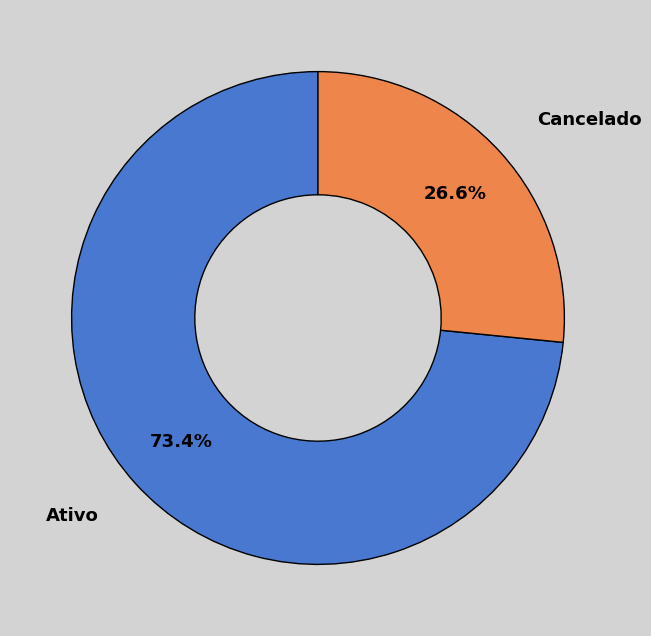

In [16]:
# Porcentagem de Contratos Ativos
colors = sns.color_palette("muted")
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_facecolor('lightgrey')
ax.pie(df_customer['Churn'].value_counts(), labels=['Ativo', 'Cancelado'],
        colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5,edgecolor='black'),
        textprops={'fontsize': 13, 'weight': 'bold'},labeldistance=
        1.2, pctdistance=0.75)
plt.show()

/tmp/ipykernel_8936/2161637115.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize=12)
/tmp/ipykernel_8936/2161637115.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize=12)
/tmp/ipykernel_8936/2161637115.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize=12)


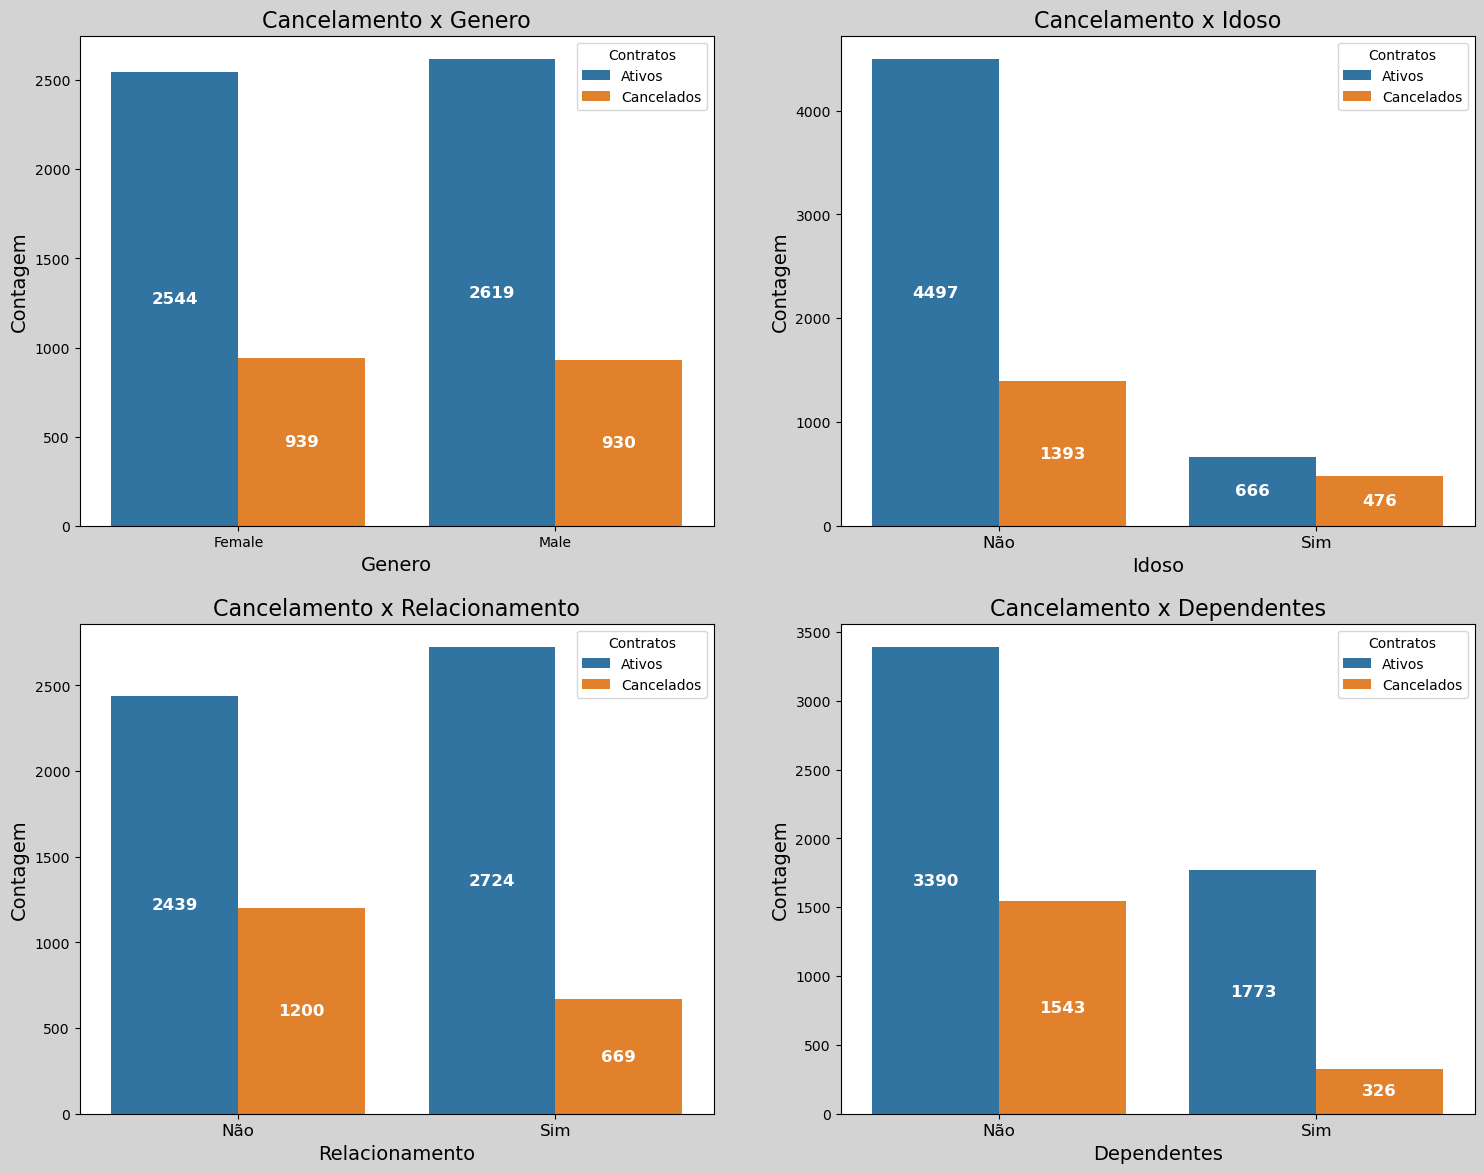

In [17]:
# Analise de Dados Categóricos com Cancelamentos
fig, axs = plt.subplots( 2,2, figsize= (18,14))
fig.set_facecolor('lightgrey')

categoria = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
titulos = ['Cancelamento x Genero', 'Cancelamento x Idoso' , 'Cancelamento x Relacionamento', 'Cancelamento x Dependentes']
axs = axs.flatten()

for i,cat in enumerate(categoria):
  ax = axs[i]
  sns.countplot(data=df_customer, x=cat, hue='Churn', ax=ax)
  ax.set_title(titulos[i],fontsize=16)
  ax.set_xlabel(titulos[i].split()[-1],fontsize=14)
  if df_customer[cat].isin([0, 1]).all():
        ax.set_xticklabels(['Não', 'Sim'],fontsize=12)
  ax.set_ylabel('Contagem',fontsize=14)
  ax.legend(title='Contratos', labels=['Ativos', 'Cancelados'])
  for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='white',weight='bold')
      
plt.show()



/tmp/ipykernel_8936/1489562117.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  else: ax.set_xticklabels(['DLS', " Fibra Optica" , "Sem Internet"],fontsize = 14)
/tmp/ipykernel_8936/1489562117.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
/tmp/ipykernel_8936/1489562117.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
/tmp/ipykernel_8936/1489562117.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
/tmp/ipykernel_8936/1489562117.py:24: UserWarning: set_ticklabels() should only be used with a fixe

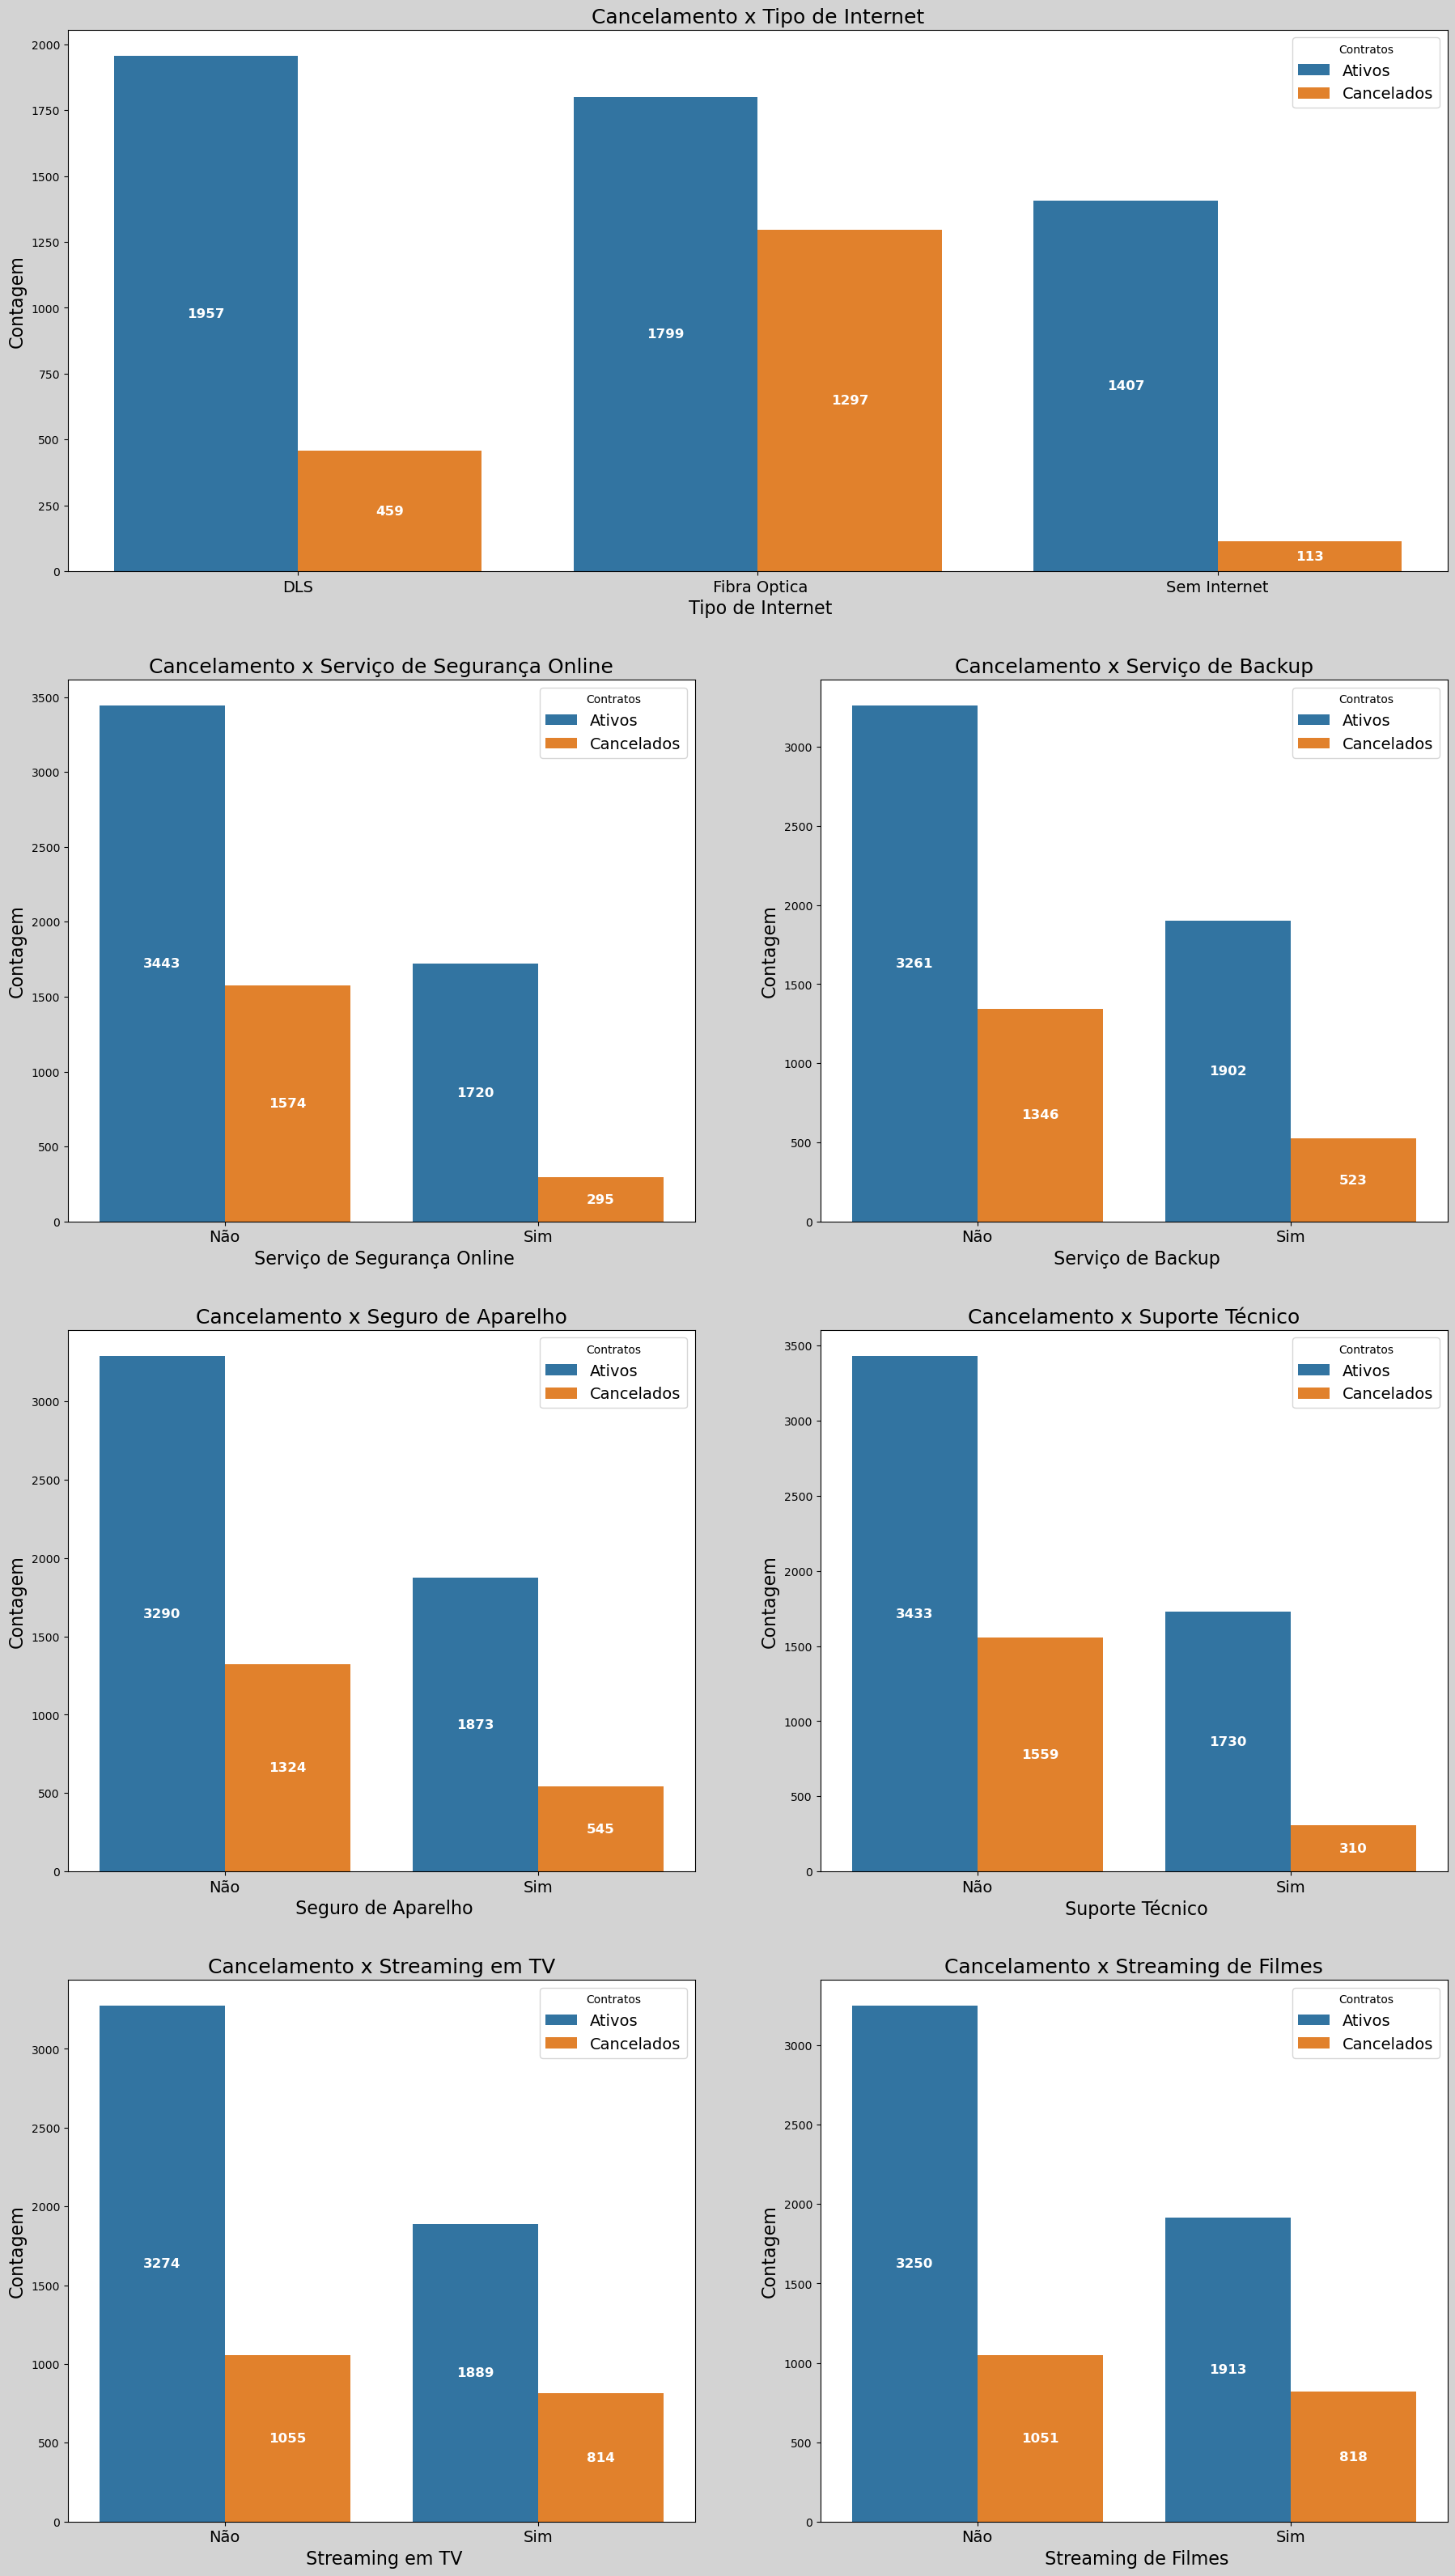

In [18]:
# Analise de Dados Categóricos de Internt com Cancelamentos
fig = plt.figure(figsize=(22, 40))
fig.set_facecolor('lightgrey')
gs = gridspec.GridSpec(4, 2, figure=fig)

axs = []
axs.append(fig.add_subplot(gs[0, :]))  # Linha 0, todas as colunas
axs.append(fig.add_subplot(gs[1, 0]))  # Linha 1, coluna 0
axs.append(fig.add_subplot(gs[1, 1]))  # Linha 1, coluna 1
axs.append(fig.add_subplot(gs[2, 0]))  # Linha 2, coluna 0
axs.append(fig.add_subplot(gs[2, 1]))  # Linha 2, coluna 1
axs.append(fig.add_subplot(gs[3, 0]))  # Linha 3, coluna 0
axs.append(fig.add_subplot(gs[3, 1]))

categoria = df_internet.columns[2:]
titulos = ['Cancelamento x Tipo de Internet', 'Cancelamento x Serviço de Segurança Online' , 'Cancelamento x Serviço de Backup', 'Cancelamento x Seguro de Aparelho' , 'Cancelamento x Suporte Técnico','Cancelamento x Streaming em TV','Cancelamento x Streaming de Filmes']

for i,cat in enumerate(categoria):
  ax = axs[i]
  sns.countplot(data=df_internet, x=cat, hue='Churn', ax=ax)
  ax.set_title(titulos[i],fontsize = 18)
  ax.set_xlabel(titulos[i].split('x')[-1],fontsize = 16)
  if df_internet[cat].isin([0, 1]).all():
        ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
  else: ax.set_xticklabels(['DLS', " Fibra Optica" , "Sem Internet"],fontsize = 14)
  ax.set_ylabel('Contagem',fontsize = 16)
  ax.legend(title='Contratos', labels=['Ativos', 'Cancelados'],fontsize = 14)
  for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='white',weight='bold')
      
plt.show()

/tmp/ipykernel_8936/3246988967.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
/tmp/ipykernel_8936/3246988967.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)


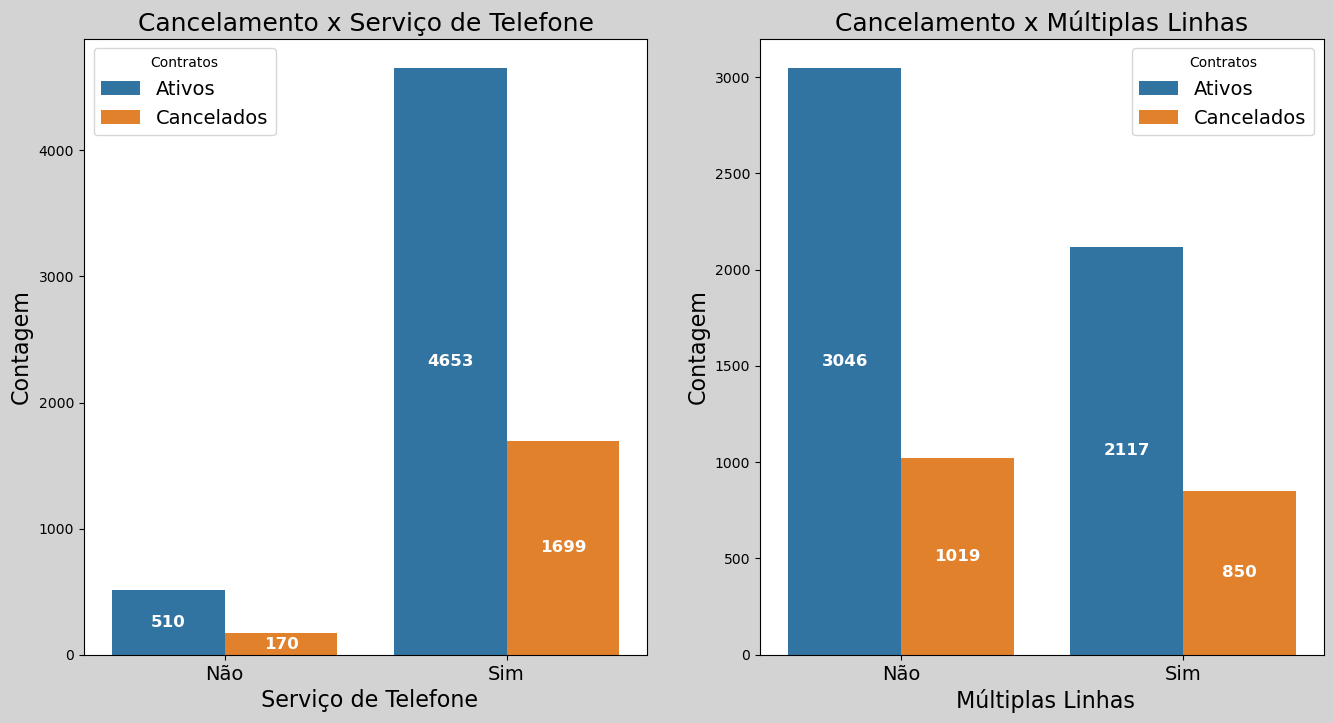

In [19]:
# Analise de Dados Categóricos de Telefone com Cancelamentos
fig, axs = plt.subplots( 1,2, figsize= (16,8))
fig.set_facecolor('lightgrey')

categoria = df_phone.columns[2:]
titulos = ['Cancelamento x Serviço de Telefone', 'Cancelamento x Múltiplas Linhas']
axs = axs.flatten()

for i,cat in enumerate(categoria):
  ax = axs[i]
  sns.countplot(data=df_phone, x=cat, hue='Churn', ax=ax)
  ax.set_title(titulos[i],fontsize = 18)
  ax.set_xlabel(titulos[i].split('x')[-1],fontsize = 16)
  if df_phone[cat].isin([0, 1]).all():
        ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
  ax.set_ylabel('Contagem',fontsize = 16)
  ax.legend(title='Contratos', labels=['Ativos', 'Cancelados'],fontsize = 14)
  for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='white',weight='bold')
      
plt.show()

/tmp/ipykernel_8936/896442878.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1 Ano', 'Mês a mês', '2 Anos'],fontsize = 14)
/tmp/ipykernel_8936/896442878.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
/tmp/ipykernel_8936/896442878.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Cobrança por Correio', 'Cobrança Eletrônica' , 'Crédito Automático', 'Débito Automático'],fontsize = 14)


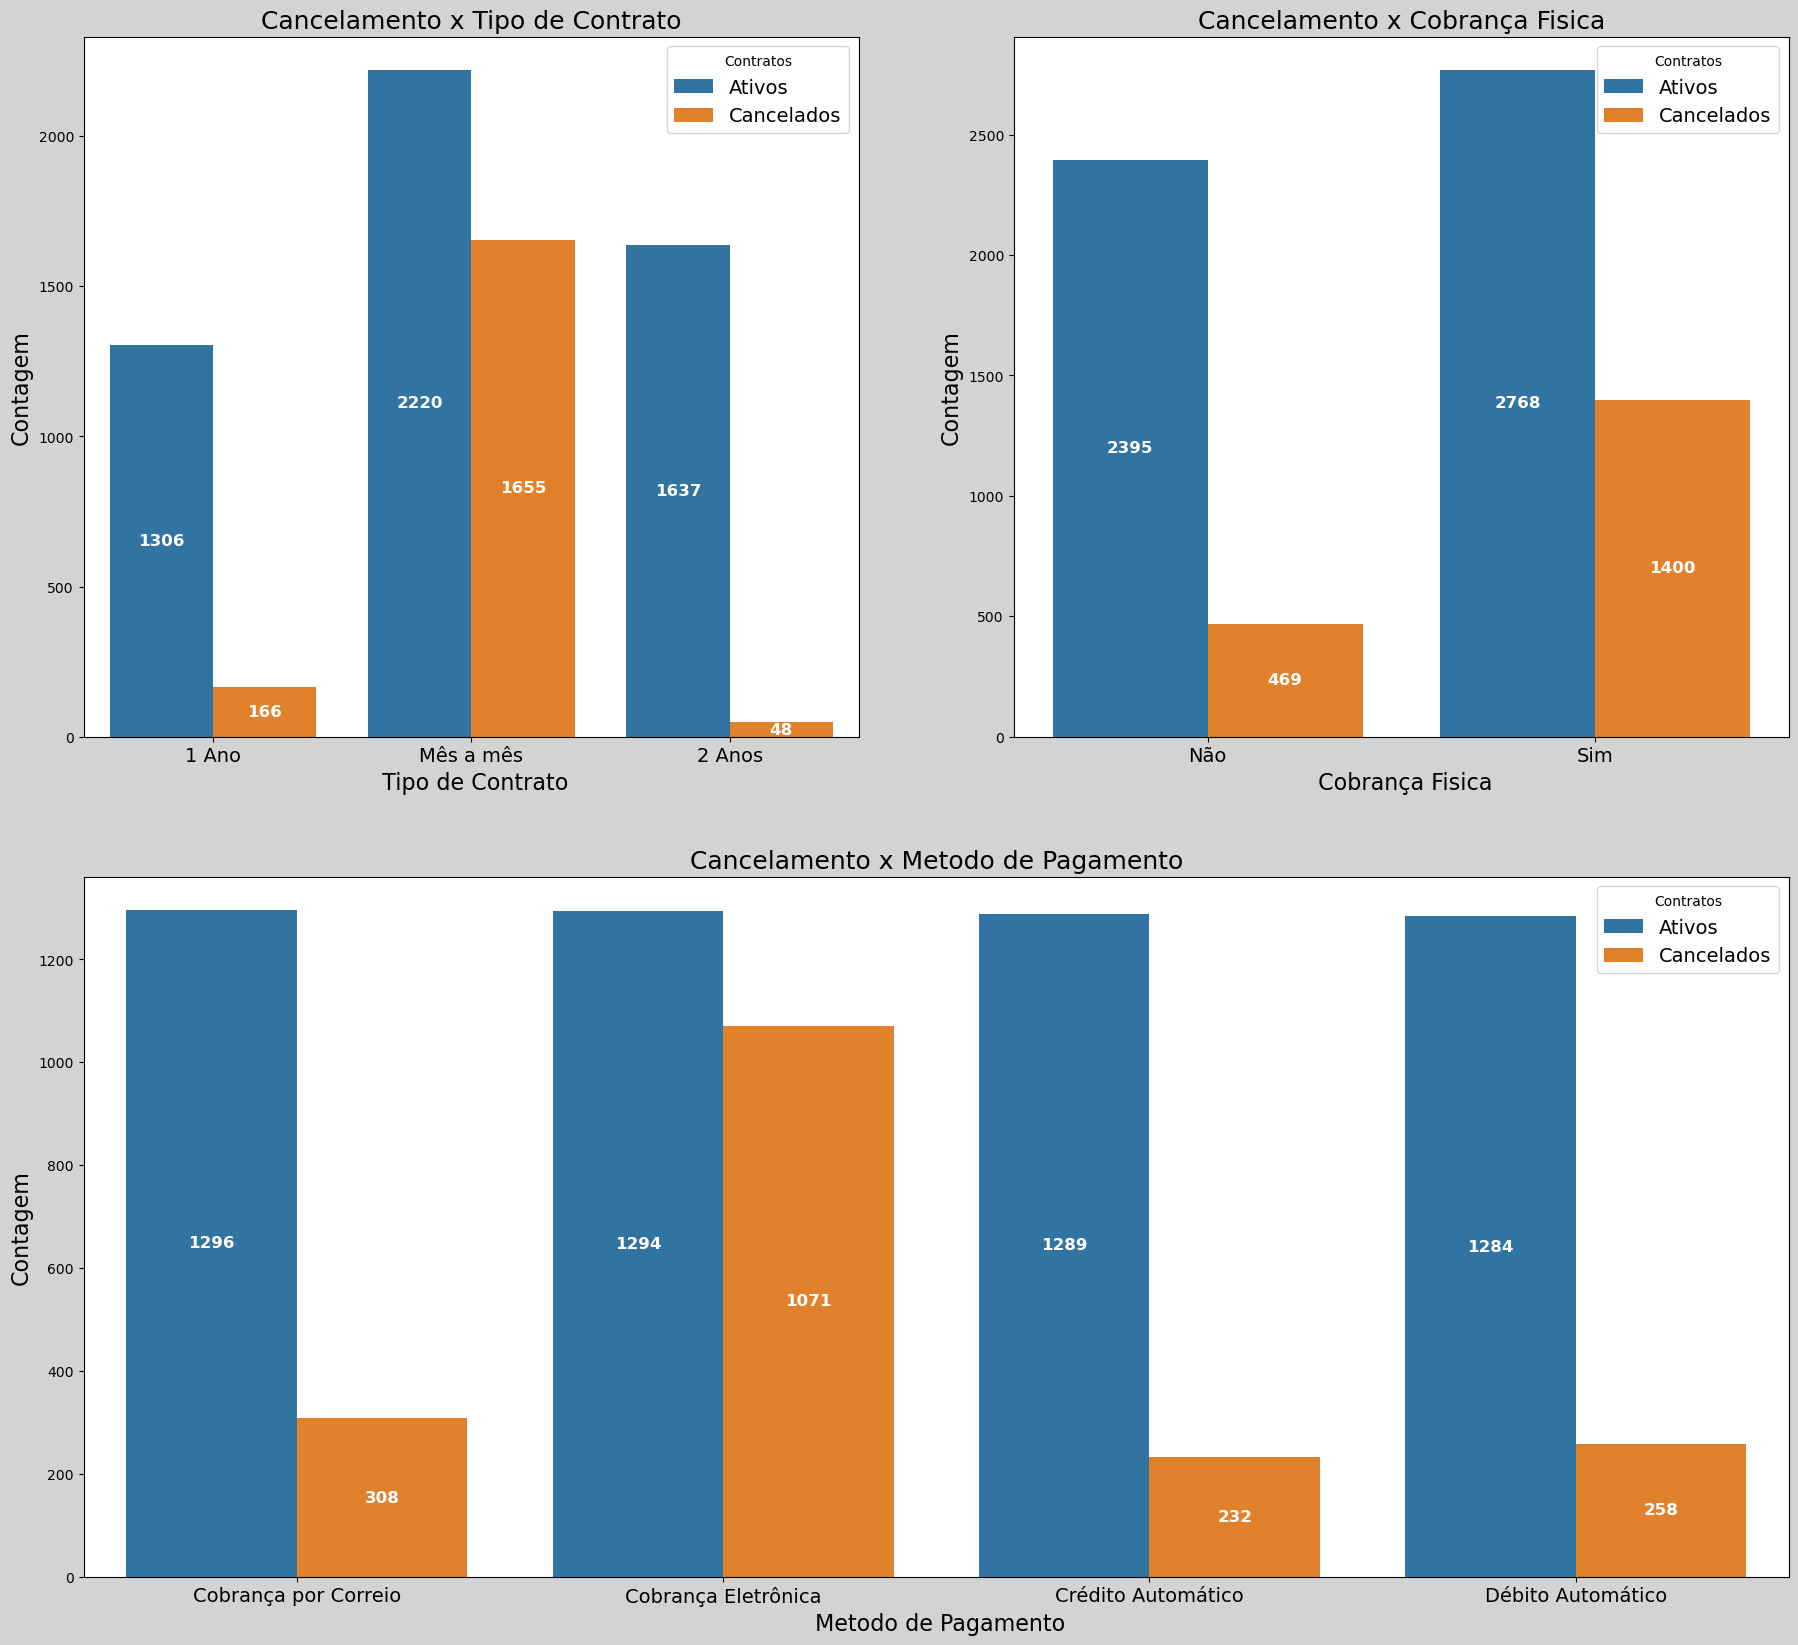

In [24]:
# Analise de Dados Categóricos de Internt com Cancelamentos
fig = plt.figure(figsize=(22, 20))
fig.set_facecolor('lightgrey')
gs = gridspec.GridSpec(2, 2, figure=fig)

axs = []
axs.append(fig.add_subplot(gs[0, 0]))  
axs.append(fig.add_subplot(gs[0, 1]))  
axs.append(fig.add_subplot(gs[1, :]))  

categoria = df_account.columns[2:-3]
titulos = ['Cancelamento x Tipo de Contrato', 'Cancelamento x Cobrança Fisica' , 'Cancelamento x Metodo de Pagamento']

for i,cat in enumerate(categoria):
  ax = axs[i]
  sns.countplot(data=df_account, x=cat, hue='Churn', ax=ax)
  ax.set_title(titulos[i],fontsize = 18)
  ax.set_xlabel(titulos[i].split('x')[-1],fontsize = 16)
  if df_account[cat].isin([0, 1]).all():
        ax.set_xticklabels(['Não', 'Sim'],fontsize = 14)
  elif df_account[cat].isin(['One year','Month-to-month','Two year']).all():
        ax.set_xticklabels(['1 Ano', 'Mês a mês', '2 Anos'],fontsize = 14)
  else : 
        ax.set_xticklabels(['Cobrança por Correio', 'Cobrança Eletrônica' , 'Crédito Automático', 'Débito Automático'],fontsize = 14)
  ax.set_ylabel('Contagem',fontsize = 16)
  ax.legend(title='Contratos', labels=['Ativos', 'Cancelados'],fontsize = 14)
  for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=12, color='white',weight='bold')
      
plt.show()

#### Analise Gráfica de Dados Numéricos

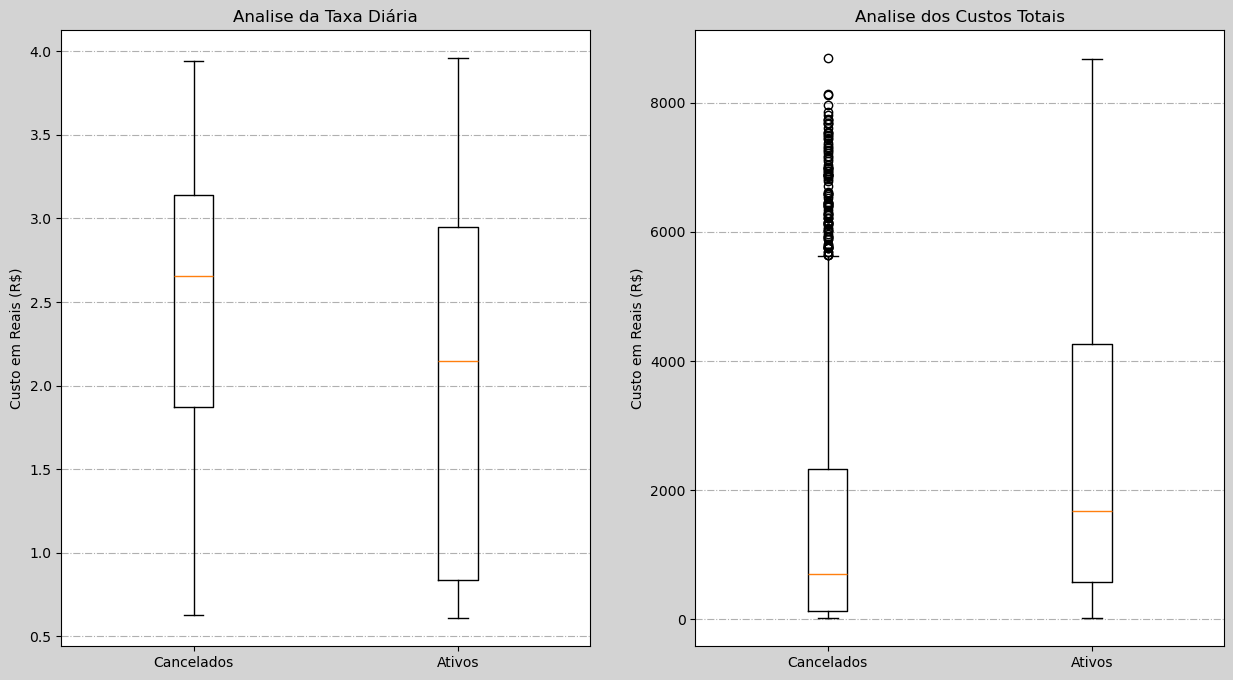

In [21]:
fig,axs = plt.subplots(1,2,figsize=(15,8))

fig.set_facecolor('lightgrey')

axs[0].boxplot([df_account.loc[df_account['Churn']==1,'Charges.Diary'],df_account.loc[df_account['Churn']==0,'Charges.Diary']])
axs[0].grid(linestyle = '-.',axis = 'y',markersize = 1)
axs[0].set_title("Analise da Taxa Diária")
axs[0].set_xticks([1,2],['Cancelados','Ativos'])
axs[0].set_ylabel('Custo em Reais (R$)')

axs[1].boxplot([df_account.loc[df_account['Churn']==1,'Charges.Total'],df_account.loc[df_account['Churn']==0,'Charges.Total']])
axs[1].grid(linestyle = '-.',axis = 'y',markersize = 1)
axs[1].set_title("Analise dos Custos Totais")
axs[1].set_xticks([1,2],['Cancelados','Ativos'])
axs[1].set_ylabel('Custo em Reais (R$)')

plt.show()

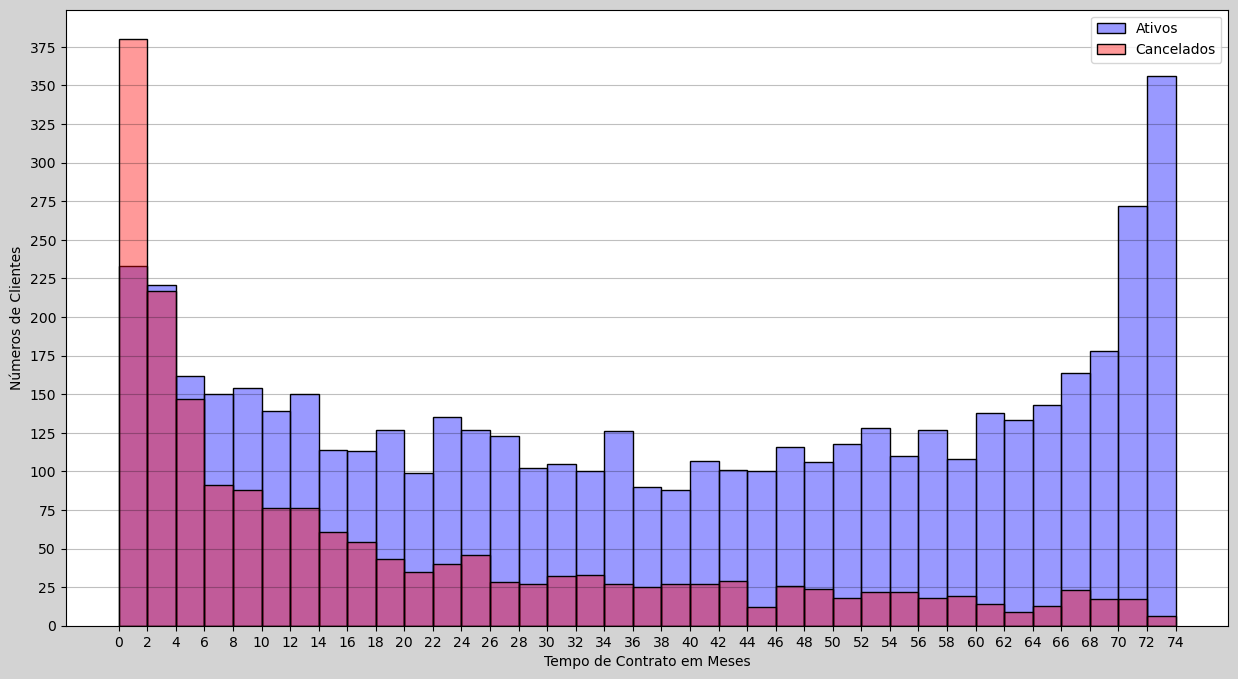

In [22]:
plt.figure(figsize=(15, 8))
plt.gcf().set_facecolor('lightgrey')
sns.histplot(df_customer.loc[df_customer['Churn']==0,'tenure'], color='blue', bins=np.arange(0,76,2), label='Ativos', alpha=0.4)
sns.histplot(df_customer.loc[df_customer['Churn']==1,'tenure'], color='red', bins=np.arange(0,76,2), label='Cancelados', alpha=0.4)

plt.title('')
plt.xlabel('Tempo de Contrato em Meses')
plt.ylabel('Números de Clientes')
plt.yticks(np.arange(0,400,25))
plt.xticks(np.arange(0,76,2))
plt.legend()
plt.grid(alpha = 0.25,axis = 'y', color = 'black')
plt.show()

#### Valor de Correlação

In [23]:
for i in df_customer.columns:
  if i != "Churn":
    try: print('Correlação entre Evasão e %s : %.3f  \n' %(i ,np.corrcoef(df_customer['Churn'],df_customer[i])[0,1]))
    except: continue

for i in df_account.columns:
  if i != "Churn":
    try: print('Correlação entre Evasão e %s : %.3f  \n' %(i ,np.corrcoef(df_account['Churn'],df_account[i])[0,1]))
    except: continue

for i in df_internet.columns:
  if i != "Churn":
    try: print('Correlação entre Evasão e %s : %.3f  \n' %(i ,np.corrcoef(df_internet['Churn'],df_internet[i])[0,1]))
    except: continue

for i in df_phone.columns:
  if i != "Churn":
    try: print('Correlação entre Evasão e %s : %.3f  \n' %(i ,np.corrcoef(df_phone['Churn'],df_phone[i])[0,1]))
    except: continue

Correlação entre Evasão e SeniorCitizen : 0.151  

Correlação entre Evasão e Partner : -0.150  

Correlação entre Evasão e Dependents : -0.163  

Correlação entre Evasão e tenure : -0.354  

Correlação entre Evasão e PaperlessBilling : 0.191  

Correlação entre Evasão e Charges.Monthly : 0.193  

Correlação entre Evasão e Charges.Total : -0.199  

Correlação entre Evasão e Charges.Diary : 0.193  

Correlação entre Evasão e OnlineSecurity : -0.171  

Correlação entre Evasão e OnlineBackup : -0.082  

Correlação entre Evasão e DeviceProtection : -0.066  

Correlação entre Evasão e TechSupport : -0.165  

Correlação entre Evasão e StreamingTV : 0.063  

Correlação entre Evasão e StreamingMovies : 0.061  

Correlação entre Evasão e PhoneService : 0.012  

Correlação entre Evasão e MultipleLines : 0.040  



### Relatório Final 

#### Objetivos

O presente notebook tem por fim realizar a limpeza de um banco de dados dos clientes da Telecom X, para posterior analise dos indices de evasão desses clientes bem como identificar possíveis causas para o fato.

##### Limpeza
 
Foram removidas linhas com valores ausentes ou inconsistentes, especialmente nas colunas `Churn` e `Charges.Total`.  
As variáveis categóricas foram transformadas em binárias para facilitar a futura análise estatística.  
Os dados foram normalizados e divididos em diferentes DataFrames para facilitar a visualização e análise.

##### Análise  
Foram realizadas análises descritivas e gráficas das variáveis categóricas e numéricas, destacando as principais correlações com a evasão de clientes (`Churn`) por meio da função *np.corrcoef()*.  
As variáveis com maior correlação negativa, ou seja quando maior os seus valores, menor a probabilidade de evasão, foram: `tenure`, `Charges.Total`, `OnlineSecurity` e `TechSupport`.  
Já as variáveis com maior correlação positiva, ou seja quando maior os seus valores, maior a probabilidade de evasão, foram: `Charges.Monthly`, `Charges.Diary`, `PaperlessBilling` e `SeniorCitizen`.

##### Conclusão  
Os principais Insights retirados da nossa análise foram:
-  Clientes com maior tempo de contrato tendem a permanecer com a empresa, sendo o periodo crítico até o 6° mês.  
-  Métodos de pagamento eletrônicos e não automáticos estão associados a maior evasão.
-  Serviços adicionais de segurança, suporte técnico e backup estão associados a menor evasão.  

##### Recomendação Final 
Recomenda-se focar em estratégias de retenção para clientes com contratos mensais, sem serviços adicionais e que utilizam métodos de pagamento eletrônicos. Uma solução seria entrar em contato com esses clientes que se enquadram nesses aspectos para uma pesquisa de satisfação e oferecimento de ofertas para mudança de plano.
